<a href="https://colab.research.google.com/github/shivangigoel1302/Data-Structures-and-algorithm/blob/master/indoml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing modules**

In [ ]:
import pandas as pd
import numpy as np

import pickle
import contractions
import sys
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.stem.porter import *
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string
import re

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

from gensim.parsing.preprocessing import remove_stopwords

#**Reading data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('drive/MyDrive/ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pip install contractions==0.0.18

In [ ]:
pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 1.3 MB 11.0 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=a8268622c748bb14970283bd9b977a9803c30e2ba529aa238a35cd698a112b9f
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


#**Data interpretation**

###**Distribution of languages used in comments in dataset**

In [ ]:
from pandas import Series
#unique languages
unlang=['Hindi','English','Malayalam','Telugu','Tamil','Punjabi','Kannada' ,'Bengali' ,'Odia','Bhojpuri','Marathi', 'Gujarati','Haryanvi','Rajasthani','Assamese','Urdu']

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
  
  
fig = plt.figure(figsize =(10, 7))
# plt.pie(language, labels=unlang)
patches, texts = plt.pie(language, startangle=90)
plt.legend(patches, unlang, loc="upper center", bbox_to_anchor=(1.05, 1))
plt.title('Distribution of Languages used in comments')
plt.tight_layout()
  
# show plot
plt.show()

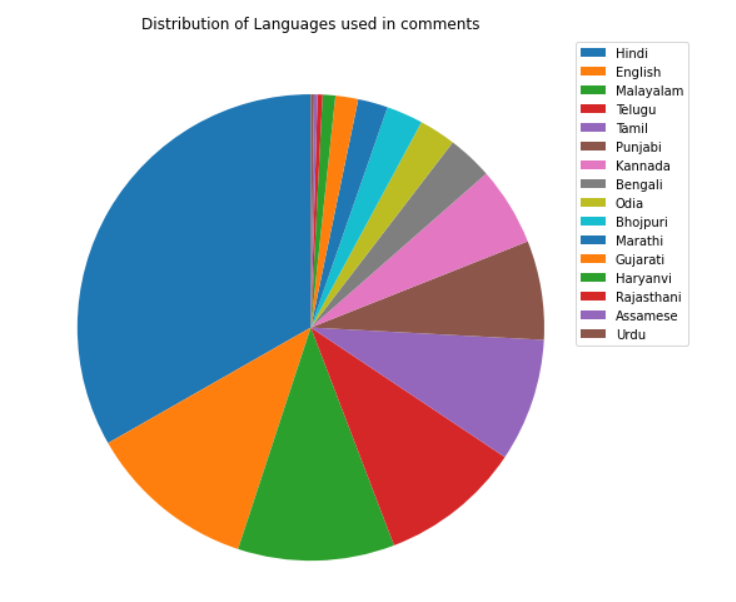

In [ ]:
x = unlang
y = language

plt.barh(x,y)
plt.title('Distribution of Languages used in comments')
plt.show()

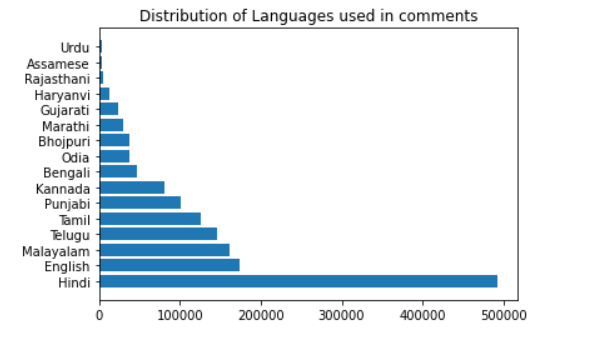

###**Comment type distribution**

In [ ]:
ab=df['label'].value_counts()
print(ab)
ab=np.array(ab)

fig = plt.figure(figsize =(10, 7))
# plt.pie(language, labels=unlang)
label=['Non Abusive', 'Abusive']
patches, texts = plt.pie(ab, startangle=90)
plt.legend(patches, label , loc="upper center", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.title('Types of Comments')
  
# show plot
plt.show()

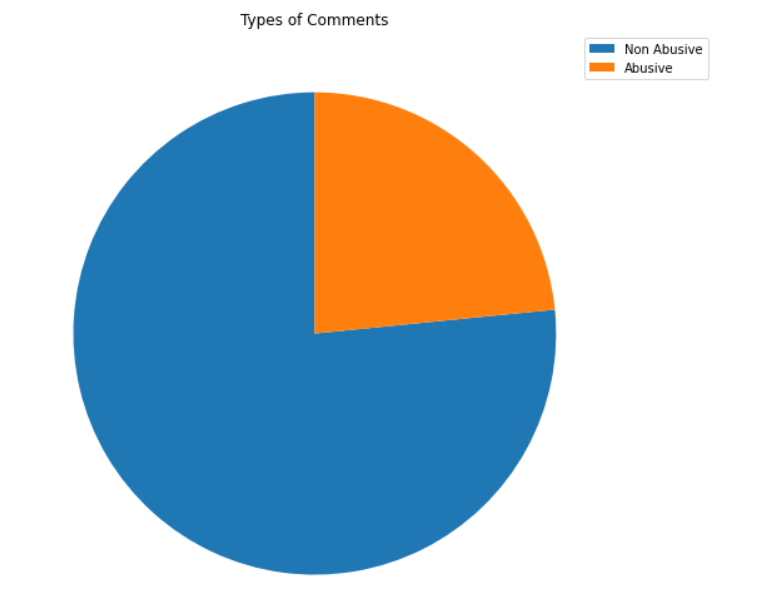

In [ ]:
y = ab
x = label

plt.barh(x,y)
plt.title('Types of Comments')
plt.show()

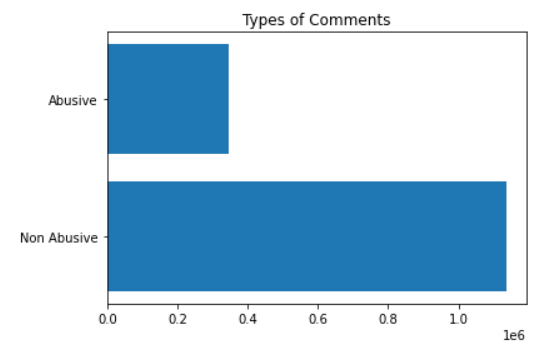

#**Emoji removal**

In [ ]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#**Language Translation**

In [ ]:
from googletrans import Translator
def translatestring(s):
  translator = Translator()
  translation=translator.translate(s)

  return translation.text

#**Basic preprocessing, Stemming and tokenization**

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

stemmer = PorterStemmer()
def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text = remove_stopwords(parsed_text)
    return parsed_text

def tokenize(text):
    text = text.split(' ')
    return text
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
#     tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
#     tokens = [stemmer.stem(t) for t in tweet.split()]
#     return tokens

def removepunct(s):
   """Removes punctuation"""
    for ele in s:
        if ele in punc:
            s = s.replace(ele, "")
    s = re.sub('[^a-zA-Z0-9-.]', ' ', s)
    return s

def contract(word):
   """converts the contracted words to it's original form,
   example - can't -> cannot """
    expanded_words = []    
    for word in word.split():
      # using contractions.fix to expand the shotened words
      expanded_words.append(contractions.fix(word))   

    expanded_text = ' '.join(expanded_words)
    return expanded_text

def removeexpansion(s):
     """converts expanded words to original form,
     example- hiiiiiiii -> hi"""
    s=re.sub(r'(.)\1+', r'\1\1', s)
    return s

def stemming(words):
   """converts words to root word"""
    ps = PorterStemmer()
    s = ''
    for w in words:
        s += (ps.stem(w)) + ' '
    return s
# s = "goodnighttttttttt"
# s=(removeexpansion(s))
# #s=removepunct(s)
# print(s)


In [ ]:
df['commenttranslated'] = df['commentText']
df['commenttokenize'] = df['commentText']
df['preprocessed'] = df['commentText']
    
for i in range(len(df)):
  # remove emoji
    # print(df2['commentText'][i])
    df['commenttranslated'][i] = remove_emoji(df['commenttranslated'][i])

    # remove number
    df['commenttranslated'][i] = ''.join([i for i in df['commenttranslated'][i] if not i.isdigit()])

    # translate to english
    df['commenttranslated'][i] = translatestring(df['commenttranslated'][i]) 

    #contraction
    df['commenttranslated'][i] = contract(df['commenttranslated'][i])

    #remove punctuation
    df['commenttranslated'][i] = removepunct(df['commenttranslated'][i])

    #preprocess url
    df['commenttranslated'][i] = preprocess(df['commenttranslated'][i])

    #convert to lowercase 
    df['commenttranslated'][i].lower()

    #exapnsion removal
    df['commenttranslated'][i] = removeexpansion(df['commenttranslated'][i])

    #tokenize
    df['commenttokenize'][i] = tokenize(df['commenttranslated'][i])

    #stemming
    df['preprocessed'][i] = stemming(df['commenttokenize'][i])

    # print(i)
    


In [ ]:
df.isna().sum()

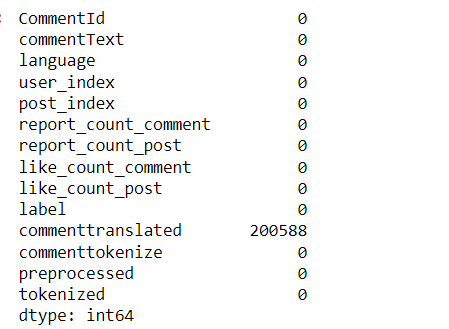

In [ ]:
df = df[df['commenttranslated'].notna()]

In [ ]:
for i in range(len(df)) :
      lab = df.iloc[i,9]
#     print(lab)
      if lab != 0.0 and lab != 1.0:
        df.drop(df.iloc[i],inplace=True)

In [ ]:
df['language'].unique()

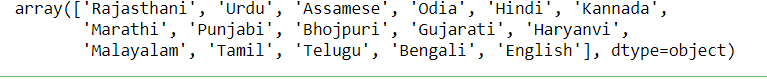